#### Step 1
do python to generate 600 random points centered at (0, 0) with variance 10, please.

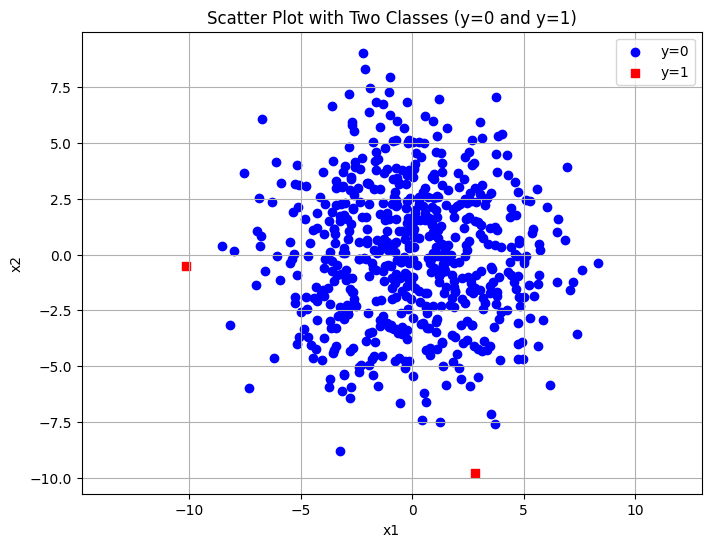

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 600
mean = 0
variance = 10

x1 = np.random.normal(mean, np.sqrt(variance), num_points)
x2 = np.random.normal(mean, np.sqrt(variance), num_points)

# Calculate distances from the origin
distances = np.sqrt(x1**2 + x2**2)

# Assign labels y=0 for points within distance 10, Y=1 for the rest
y = np.where(distances < 10, 0, 1)

# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(x1[y==0], x2[y==0], color='blue', marker='o', label='y=0')
plt.scatter(x1[y==1], x2[y==1], color='red', marker='s', label='y=1')
plt.title('Scatter Plot with Two Classes (y=0 and y=1)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()

#### Step 2
change y=0 for points in distance less than 4 and y=1 for the rest.

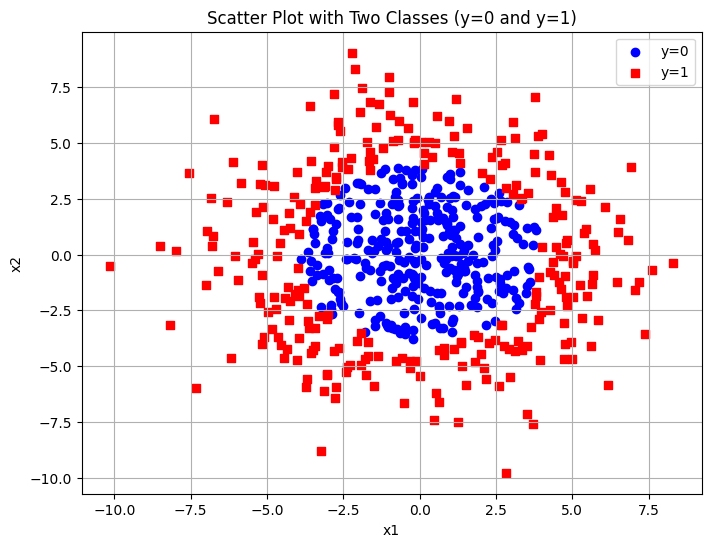

In [ ]:
# Assign labels Y=0 for points within distance 10, Y=1 for the rest
y = np.where(distances < 4, 0, 1)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x1[y==0], x2[y==0], color='blue', marker='o', label='y=0')
plt.scatter(x1[y==1], x2[y==1], color='red', marker='s', label='y=1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot with Two Classes (y=0 and y=1)')
plt.legend()
plt.grid()
plt.show()

#### Step 3
make x3=f(x1, x2) where f is a gaussian function. scatter plot 3d (x1, x2, x3) with y color, please.

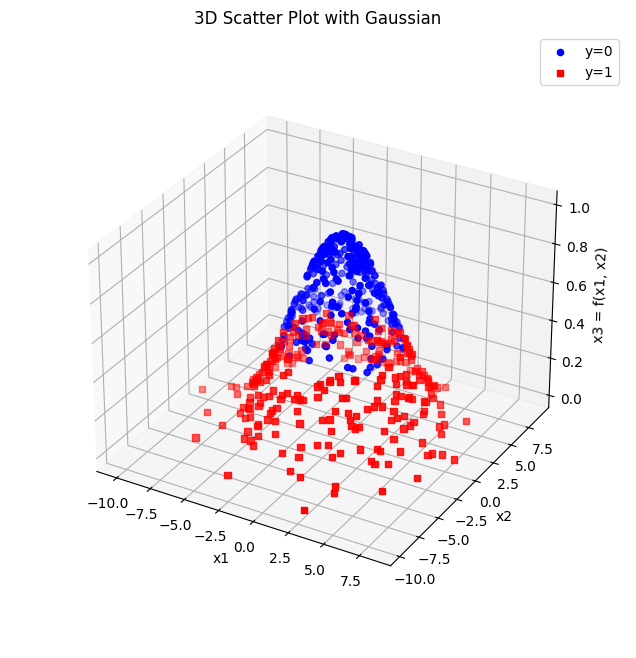

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Define Gaussian function for x3
def gaussian_function(x1, x2):
    return np.exp(-(x1**2 + x2**2) / (2 * variance))

# Compute x3 using the Gaussian function
x3 = gaussian_function(x1, x2)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points in 3D with color based on y
ax.scatter(x1[y==0], x2[y==0], x3[y==0], c='blue', marker='o', label='y=0')
ax.scatter(x1[y==1], x2[y==1], x3[y==1], c='red', marker='s', label='y=1')

# Add labels and title
ax.set_title("3D Scatter Plot with Gaussian")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3 = f(x1, x2)")
ax.set_box_aspect(None, zoom=0.85)
plt.legend()
plt.show()

#### Step 4
make a linear hyperplan (gray color) as LinearSVC that can separate the points of y=0, y=1.

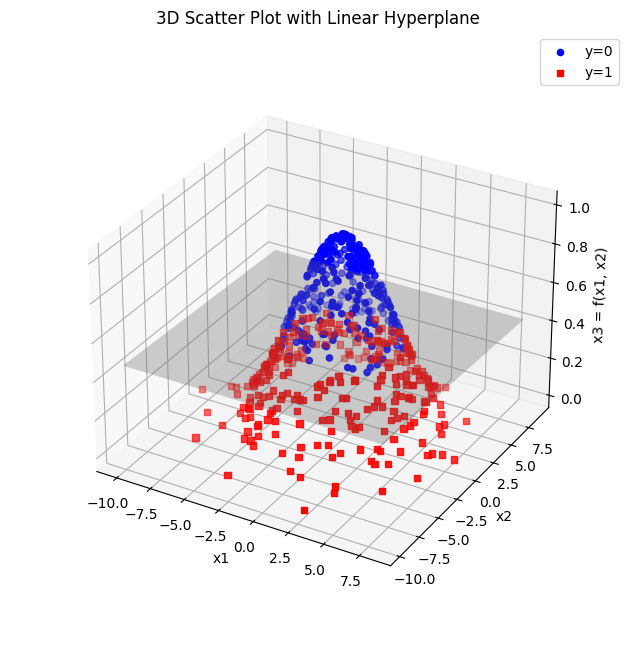

In [ ]:
from sklearn.svm import LinearSVC

# Add the hyperplane
X = np.column_stack((x1, x2, x3))
clf = LinearSVC(random_state=0, max_iter=10000)
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_

x1_mesh, x2_mesh = np.meshgrid(np.linspace(min(x1), max(x1), 10),
                               np.linspace(min(x2), max(x2), 10))

# Create a meshgrid to plot the separating hyperplane
x3_plane = (-w[0] * x1_mesh - w[1] * x2_mesh - b) / w[2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points in 3D with color based on y
ax.scatter(x1[y==0], x2[y==0], x3[y==0], c='blue', marker='o', label='y=0')
ax.scatter(x1[y==1], x2[y==1], x3[y==1], c='red', marker='s', label='y=1')
ax.plot_surface(x1_mesh, x2_mesh, x3_plane, color='gray', alpha=0.3)

# Add labels and title
ax.set_title("3D Scatter Plot with Linear Hyperplane")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3 = f(x1, x2)")
ax.set_box_aspect(None, zoom=0.85)
plt.legend()
plt.show()

#### Step 5
apply streamlit, then add a slider for dynamic threshold adjustment and how it impacts classification boundaries.  



note https://github.com/localtunnel/localtunnel/issues/621

In [ ]:
!pip install -q streamlit
!npm install --silent localtunnel

In [22]:
%%writefile main2.py

import streamlit as st
import numpy as np
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

@st.cache_data
def generate_data():
    # Parameters
    num_points = 600
    mean = 0
    variance = 10

    # Data generation
    x1 = np.random.normal(mean, np.sqrt(variance), num_points)
    x2 = np.random.normal(mean, np.sqrt(variance), num_points)
    distances = np.sqrt(x1**2 + x2**2)

    # Gaussian function
    x3 = np.exp(-(x1**2 + x2**2) / (2 * variance))

    return x1, x2, distances, x3

x1, x2, distances, x3 = generate_data();

# Streamlit app title
st.title("3D Scatter Plot with Linear Hyperplane")

col1, col2 = st.columns([1, 2])

with col1:
    # Slider for the user to adjust the classification distance threshold
    threshold = st.slider("Classification Distance Threshold (Radius)", min_value=1.0, max_value=10.0, step=0.5, value=4.0)

with col2:
    # Assign labels based on the user-defined threshold
    y = np.where(distances < threshold, 0, 1)


    # Train the linear classifier
    X = np.column_stack((x1, x2, x3))
    clf = LinearSVC(random_state=0, max_iter=10000)
    clf.fit(X, y)
    w = clf.coef_[0]
    b = clf.intercept_

    # Create the hyperplane
    x1_mesh, x2_mesh = np.meshgrid(np.linspace(min(x1), max(x1), 10),
                                np.linspace(min(x2), max(x2), 10))
    x3_plane = (-w[0] * x1_mesh - w[1] * x2_mesh - b) / w[2]

    # 3D Scatter Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot classified points
    ax.scatter(x1[y == 0], x2[y == 0], x3[y == 0], c='blue', marker='o', label='y=0')
    ax.scatter(x1[y == 1], x2[y == 1], x3[y == 1], c='red', marker='s', label='y=1')

    # Plot the hyperplane
    ax.plot_surface(x1_mesh, x2_mesh, x3_plane, color='gray', alpha=0.3)

    # Add labels and title
    ax.set_title("3D Scatter Plot with Linear Hyperplane")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3 = f(x1, x2)")
    ax.set_box_aspect(None, zoom=0.85)
    ax.legend()

    # Display the plot in Streamlit
    st.pyplot(fig)



Writing main2.py


In [ ]:
!streamlit run main2.py &>/content/logs.txt & npx localtunnel --port 8502  & curl ipv4.icanhazip.com

34.148.201.241
your url is: https://dirty-wings-suffer.loca.lt
